About Dataset ([kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/emotions?resource=download))
# Introduction

Welcome to the "Emotions" dataset – a collection of English Twitter messages meticulously annotated with six fundamental emotions: anger, fear, joy, love, sadness, and surprise. This dataset serves as a valuable resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media.

## About the Dataset

Each entry in this dataset consists of a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed. The emotions are classified into six categories: sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5). Whether you're interested in sentiment analysis, emotion classification, or text mining, this dataset provides a rich foundation for exploring the nuanced emotional landscape within the realm of social media.

## Key Features

- **text**: A string feature representing the content of the Twitter message.
- **label**: A classification label indicating the primary emotion, with values ranging from 0 to 5.

## Potential Use Cases

- Sentiment Analysis: Uncover the prevailing sentiments in English Twitter messages across various emotions.
- Emotion Classification: Develop models to accurately classify tweets into the six specified emotion categories.
- Textual Analysis: Explore linguistic patterns and expressions associated with different emotional states.

## Sample Data

Here's a glimpse of the dataset with a few examples:

| text                                               | label |
|----------------------------------------------------|-------|
| that was what i felt when i was finally accept…    | 1     |
| i take every day as it comes i'm just focussin…    | 4     |
| i give you plenty of attention even when i fee…    | 0     |

If you find this dataset useful consider giving it a vote! 😊❤️

---


In [1]:
#imports 
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
import string
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
import emoji



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timst\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\timst\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


loading the data

In [6]:
# load the emotion_data.csv into a pd dataframe
df = pd.read_csv('emotion_data.csv')
#to remove the first column which is unnamed (ID)
df.drop('Unnamed: 0', axis=1, inplace=True)

#rename lable to num_lable 
df.rename(columns={'label':'num_label'}, inplace=True)

#add a text_lable column
# Define a dictionary to map numerical labels to corresponding emotions
label_map = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

df['text_label'] = df['num_label'].map(label_map)

infos about the data

In [7]:
print('dataframe head')
print(df.head())
print('\n dataframe shape')
print(df.shape)

dataframe head
                                                text  num_label text_label
0      i just feel really helpless and heavy hearted          4       Fear
1  ive enjoyed being able to slouch about relax a...          0    Sadness
2  i gave up my internship with the dmrg and am f...          4       Fear
3                         i dont know i feel so lost          0    Sadness
4  i am a kindergarten teacher and i am thoroughl...          4       Fear

 dataframe shape
(416809, 3)


---

now we clean up the text 

In [8]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

# Utility Functions
def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

def replace_chat_words(text):
    words = text.split()
    return ' '.join([chat_words.get(word.upper(), word) for word in words])

def remove_emojis(text):
    return emoji.demojize(text)

def expand_contractions(text):
    return contractions.fix(text)

def remove_special_symbols(text):
    return re.sub(r'[@#]\w+', '', text)

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Preprocessing pipeline
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = expand_contractions(text)
    tokens = word_tokenize(text)
    tokens = remove_stop_words(tokens)
    text = ' '.join(tokens)
    text = replace_chat_words(text)
    text = remove_emojis(text)
    text = lemmatize_text(text)
    text = text.lower().strip()
    return text

# Apply preprocessing and optional sentiment scoring
df['text_cleaned'] = df['text'].apply(preprocess_text)
df['text_sentiment'] = df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save to CSV
df.to_csv('cleaned_emotion_data.csv', index=False)

NameError: name 'contractions' is not defined

In [2]:
# to cut down on runtime
df = pd.read_csv('cleaned_emotion_data.csv')
df['text'] = df['text'].astype(str)
df['text_stemmed'] = df['text_stemmed'].astype(str)

---

Now we take closer look into the data

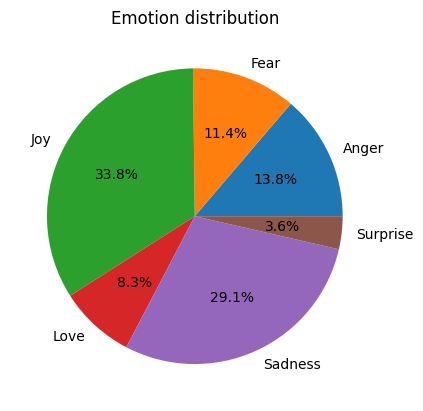

In [3]:
# plot how many samples we have for each emotion in a pie chart
df_grouped = df.groupby('text_label').count()
df_grouped['num_label'].plot.pie(autopct='%1.1f%%')
plt.title('Emotion distribution')
plt.ylabel('')
plt.show()


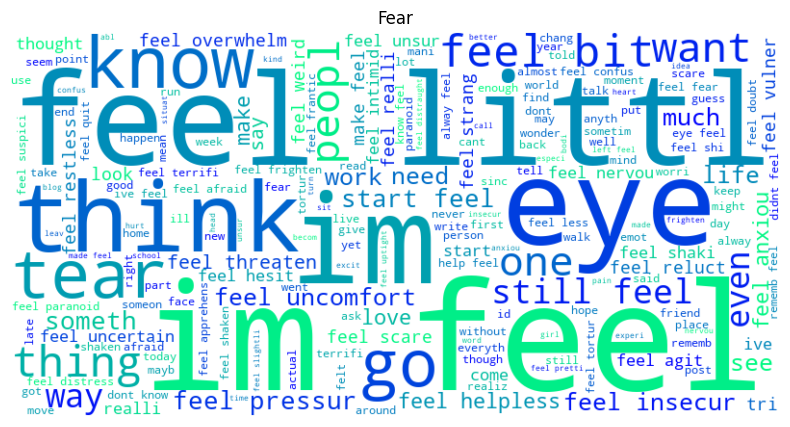

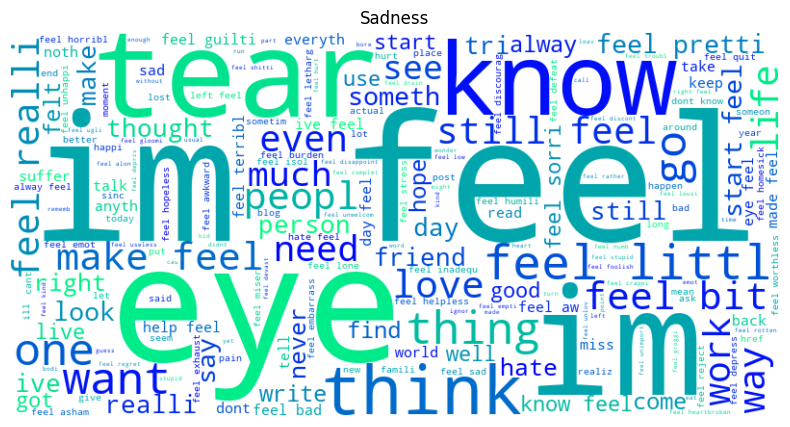

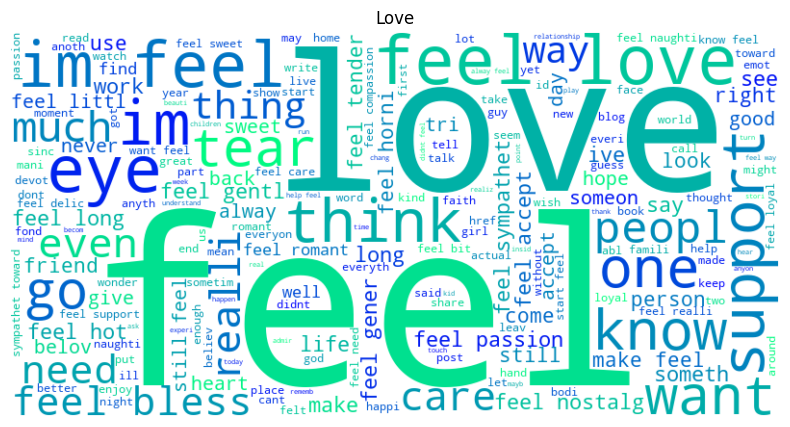

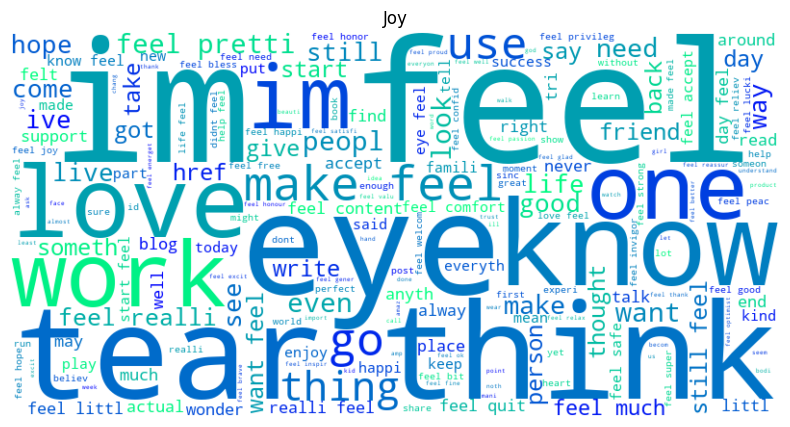

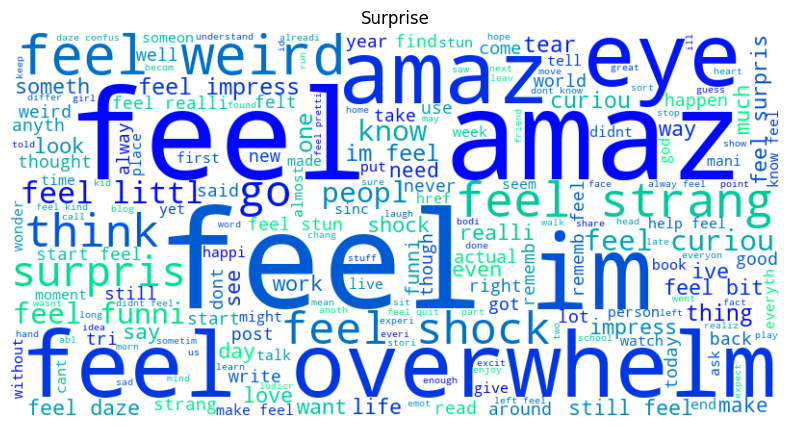

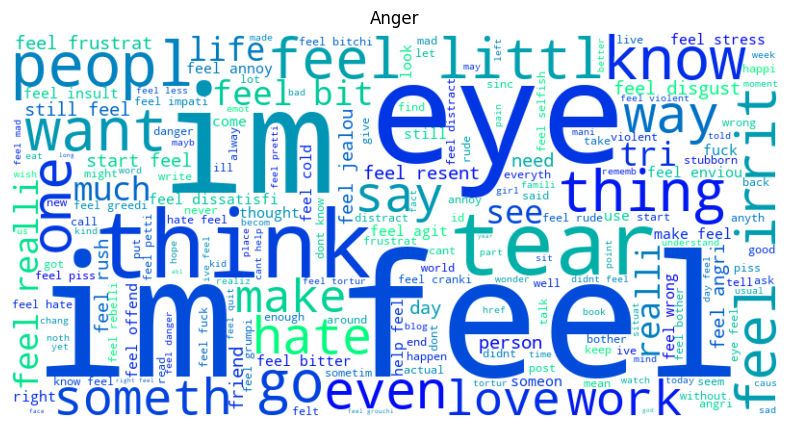

In [15]:
# create a word cloud for each emotion
emotions = df['text_label'].unique()
for emotion in emotions:
    text = ' '.join(df[df['text_label'] == emotion]['text_stemmed'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='winter').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(emotion)
    plt.show()


--- 

now we come to the good part


c:\Users\timst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8787936949689307
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     24238
           1       0.89      0.92      0.90     28214
           2       0.78      0.69      0.73      6911
           3       0.87      0.88      0.88     11463
           4       0.83      0.85      0.84      9542
           5       0.77      0.67      0.72      2994

    accuracy                           0.88     83362
   macro avg       0.85      0.82      0.83     83362
weighted avg       0.88      0.88      0.88     83362



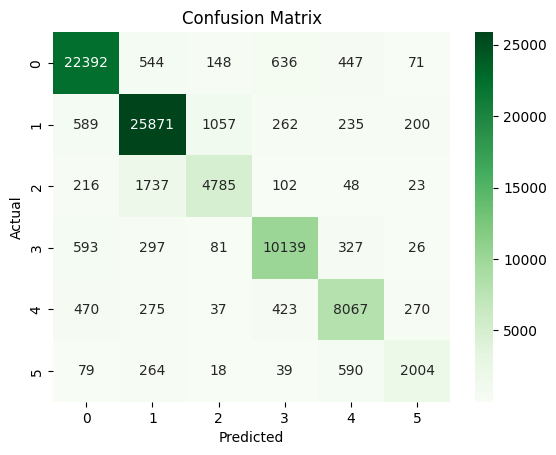

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Features (X) and Labels (y)
X = df['text_stemmed']
y = df['num_label']

# Stratified Train-Test Split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = tfidf.transform(X_test)  # Only transform the test data

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions on test set
y_pred = model.predict(X_test_tfidf)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
